In [129]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

# Навигация

1. [Общая информация](#common)
2. [Преобразование данных](#manip)
3. [Фильтрация данных](#filter)
4. [Графический анализ](#vis)
5. [Решение задачи классификации](#ml)
6. [Оценка качества полученной модели](#estimate)

In [73]:
data = pd.read_csv('auto.csv')

In [74]:
pd.set_option('display.max_columns', None) # настроим вывод всех столбцов
data.head(10)

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Привод,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
5,Audi,A3 Sedan,sport 2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
6,Audi,A3 Sportback,1.4 TFSI 7AMT,Хэтчбек класса B,5,5,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,220 км/ч,6 / 4.3 / 4.9,140 мм,4313 × 1785 × 1426,2637 мм,380 л,1220 л,50 л,1315 кг
7,Audi,A3 Sportback,sport 1.4 TFSI 7AMT,Хэтчбек класса B,5,5,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,220 км/ч,6 / 4.3 / 4.9,140 мм,4313 × 1785 × 1426,2637 мм,380 л,1220 л,50 л,1315 кг
8,Audi,A3 Sportback,2.0 TFSI 7AMT,Хэтчбек класса B,5,5,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,244 км/ч,7.2 / 4.8 / 5.7,140 мм,4313 × 1785 × 1426,2637 мм,380 л,1220 л,50 л,1390 кг
9,Audi,A3 Sportback,2.0 TFSI 7AMT quattro,Хэтчбек класса B,5,5,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,236 км/ч,7.2 / 4.9 / 5.8,140 мм,4313 × 1785 × 1426,2637 мм,340 л,1180 л,55 л,1460 кг


<a id='common'></a>
## Общая информация

Общий размер датасета

In [75]:
data.shape

(1703, 21)

Пропущенные значения

In [76]:
data.isnull().sum()

brand                                                    0
model                                                    0
complect                                                 0
type_car                                                 0
seats                                                    0
doors                                                    0
Двигатель                                                0
Мощность                                                 0
Крутящий момент двигателя                                0
Коробка передач                                          0
Привод                                                   0
Разгон до сотни                                          0
Максимальная скорость                                    0
Расход топлива (л/100 км)\nгород / трасса / смешанный    0
Дорожный просвет                                         0
Габариты (длина × ширина × высота)                       0
Колёсная база                                           

Пропущенных значений нет

Дубликаты

In [77]:
data.duplicated().sum()

0

Дубликатов тоже нет

<a id='manip'></a>
## Преобразование данных

Займемся небольшими преобразованиями, а именно приведением к численному виду, чтобы в дальнейшем было проще анализировать. И перенесём единицы измерения в названия столбца, чтобы они не дублировались в каждой строке.

In [78]:
columns_to_prep_int = ['Мощность', 'Крутящий момент двигателя',  
                   'Максимальная скорость', 'Дорожный просвет', 'Колёсная база',
                   'Объём багажника', 'Объём багажника максимальный', 'Объём топливного бака',
                   'Масса автомобиля'] # список столбцов, где содержится только число типа int

In [79]:
def parse_numbers_int(column):
    parsed_data = []
    for line in column:
        try:                                                     # пробуем регулярным выражением вернуть список из одного элемента
            parsed_data.append(int(re.findall(r'\d+', line)[0])) # обращаясь к нему и приводя к типу int
        except:
            return 'В одном из примеров не удалось выделить число типа int'
    return parsed_data

Но не все столбцы содержат число только типа **int**. Есть столбцы с **float** и есть смешанные. К счастью, их не так много, поэтому для упрощения, каждый обработаем отдельно, написав свою функцию для каждого столбца их списка:

`Коробка передач`, `Разгон до сотни`, `Расход топлива`, `Габариты`, `Двигатель`

И отдельно выделим 4 класса. Седан, хетчбек, внедорожник и кроссовер. Остальные пометим, как *редкий класс* и в дальнейшем отфильтруем по этому значению

In [80]:
def parse_boost_100(column):
    values = []
    for line in column:
        values.append(line.split(' ')[0])
    return values

In [81]:
def split_transmission(data):
    transmission_type = []
    transmission_stages = []
    for line in data:
        tmp = line.split('(')
        transmission_type.append(tmp[0])
        transmission_stages.append(int(re.findall(r'\d+', line)[0]))
    return transmission_type, transmission_stages

In [82]:
def split_fuel_consumption(data):
    city_fuel_consumption = []
    track_fuel_consumption = []
    mixed_fuel_consumption = []
    for line in data:
        tmp = line.split('/')
        city_fuel_consumption.append(tmp[0])
        track_fuel_consumption.append(tmp[1])
        mixed_fuel_consumption.append(tmp[2])
    return city_fuel_consumption, track_fuel_consumption, mixed_fuel_consumption

In [83]:
def split_size(data):
    length = []
    width = []
    height = []
    for line in data:
        tmp = line.split('×')
        length.append(tmp[0])
        width.append(tmp[1])
        height.append(tmp[2])
    return length, width, height

In [84]:
def split_engine(data):
    engine_type = []
    engine_volume = []
    for line in data:
        tmp = line.split('(')
        engine_type.append(tmp[0])
        engine_volume.append(int(re.findall(r'\d+', line)[0]))
    return engine_type, engine_volume

In [85]:
def extract_car_class(data):
    classes = ['седан', 'хэтчбек', 'кроссовер', 'внедорожник'] # 4 требуемых класса
    type_car = [] # список, куда будем записывать классы
    for line in data:
        counter = 0 # счетчик проверенных классов
        for element in classes:
            if element in line.lower(): # приводим к нижнему регистру
                type_car.append(element)
                break
            counter += 1 
            if counter == 4: # если счетчик проверенных классов достигает 4 (не найдено соответствие) - пишем "редкий класс"
                type_car.append('редкий класс') # записываем редкий класс, чтобы сохранить порядок и размер столбца
    return type_car

Применим все наши преобразования и посмотрим на результат

In [86]:
for column in columns_to_prep_int:
    data[column] = parse_numbers_int(data[column])
    
engine_type, engine_volume = split_engine(data['Двигатель'])
data['Тип двигателя'] = engine_type
data['Объем двигателся см³'] = engine_volume

data['Разгон до сотни сек'] = parse_boost_100(data['Разгон до сотни'])

transmission_type, transmission_stages = split_transmission(data['Коробка передач'])
data['Тип коробки передач'] = transmission_type
data['Количество ступеней коробки передач'] = transmission_stages

city_fuel_consumption, track_fuel_consumption, mixed_fuel_consumption = \
split_fuel_consumption(data['Расход топлива (л/100 км)\nгород / трасса / смешанный'])
data['Расход топлива в Л на 100км ГОРОД'] = city_fuel_consumption 
data['Расход топлива в Л на 100км ТРАССА'] = track_fuel_consumption
data['Расход топлива в Л на 100км СМЕШАННЫЙ'] = mixed_fuel_consumption

length, width, height = split_size(data['Габариты (длина × ширина × высота)'])
data['Длина'] = length
data['Ширина'] = width
data['Высота'] = height

data['type_car'] = extract_car_class(data['type_car'])

data.drop(['Двигатель', 'Коробка передач', 'Разгон до сотни', 'Габариты (длина × ширина × высота)',
           'Расход топлива (л/100 км)\nгород / трасса / смешанный'], axis=1, inplace=True)

И добавим единицы измерения в название столбцов

In [87]:
data.rename(columns={'Мощность': 'Мощность л.с.', 'Крутящий момент двигателя': 'Крутящий момент двигателя Н·м',
                     'Максимальная скорость': 'Максимальная скорость км/ч', 'Дорожный просвет': 'Дорожный просвет мм',
                     'Колёсная база': 'Колёсная база мм', 'Объём багажника': 'Объём багажника л',
                     'Объём багажника максимальный': 'Объём багажника максимальный л',
                     'Объём топливного бака': 'Объём топливного бака л', 'Масса автомобиля': 'Масса автомобиля кг',
                     }, inplace=True)

In [88]:
data.head(10)

,brand,model,complect,type_car,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Привод,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Тип двигателя,Объем двигателся см³,Разгон до сотни сек,Тип коробки передач,Количество ступеней коробки передач,Расход топлива в Л на 100км ГОРОД,Расход топлива в Л на 100км ТРАССА,Расход топлива в Л на 100км СМЕШАННЫЙ,Длина,Ширина,Высота
0,Audi,A3 Sedan,1.4 TFSI 7AMT,седан,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,седан,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
2,Audi,A3 Sedan,2.0 TFSI 7AMT,седан,5,4,190,320,передний,250,165,2637,425,880,50,1395,бензиновый,1984,6.8,роботизированная,7,7.2,4.7,5.6,4458,1796,1416
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,седан,5,4,190,320,полный,242,165,2637,390,845,55,1465,бензиновый,1984,6.2,роботизированная,7,7.2,4.8,5.7,4458,1796,1416
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,седан,5,4,190,320,передний,242,165,2637,425,880,50,1395,бензиновый,1984,6.8,роботизированная,7,7.2,4.7,5.6,4458,1796,1416
5,Audi,A3 Sedan,sport 2.0 TFSI 7AMT quattro,седан,5,4,190,320,полный,242,165,2637,390,845,55,1465,бензиновый,1984,6.2,роботизированная,7,7.2,4.8,5.7,4458,1796,1416
6,Audi,A3 Sportback,1.4 TFSI 7AMT,хэтчбек,5,5,150,250,передний,220,140,2637,380,1220,50,1315,бензиновый,1395,8.2,роботизированная,7,6,4.3,4.9,4313,1785,1426
7,Audi,A3 Sportback,sport 1.4 TFSI 7AMT,хэтчбек,5,5,150,250,передний,220,140,2637,380,1220,50,1315,бензиновый,1395,8.2,роботизированная,7,6,4.3,4.9,4313,1785,1426
8,Audi,A3 Sportback,2.0 TFSI 7AMT,хэтчбек,5,5,190,320,передний,244,140,2637,380,1220,50,1390,бензиновый,1984,6.8,роботизированная,7,7.2,4.8,5.7,4313,1785,1426
9,Audi,A3 Sportback,2.0 TFSI 7AMT quattro,хэтчбек,5,5,190,320,полный,236,140,2637,340,1180,55,1460,бензиновый,1984,6.2,роботизированная,7,7.2,4.9,5.8,4313,1785,1426


<a id='filter'></a>
# Фильтрация

И сразу применим фильтрацию по классу, чтобы не обрабатывать данные у редких классов

In [89]:
data = data.loc[data['type_car'] != 'редкий класс']
data.shape

(1472, 27)

Относительно немного строк было вычищено, чуть более 10%

Теперь когда данные преобразованы, посмотрим на некоторые статистики

In [90]:
data.describe()

,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Объем двигателся см³,Количество ступеней коробки передач
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,5.092391,4.934783,214.586277,345.068614,207.379755,179.629755,2787.275815,520.211277,1251.713995,63.962636,1713.724185,2259.922554,6.438859
std,0.533981,0.820265,100.676769,166.034892,30.835088,45.811626,160.631639,149.609506,595.485596,15.354434,376.051244,881.374588,2.453164
min,4.000000,2.000000,67.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,0.000000,0.000000,885.000000,0.000000,0.000000
25%,5.000000,4.000000,150.000000,200.000000,188.000000,158.000000,2670.000000,433.000000,530.000000,54.000000,1430.000000,1598.000000,6.000000
50%,5.000000,5.000000,190.000000,320.000000,205.000000,187.000000,2790.000000,508.000000,1400.000000,60.000000,1680.000000,1997.000000,7.000000
75%,5.000000,5.000000,249.000000,440.000000,230.000000,210.000000,2905.000000,577.000000,1686.000000,71.000000,1955.000000,2797.500000,8.000000
max,8.000000,8.000000,639.000000,900.000000,315.000000,291.000000,3450.000000,1137.000000,3424.000000,138.000000,2817.000000,6592.000000,10.000000


Что видим из интересного: 
<li>автомобили с мощностью 67 л.с.
<li>нулевая максимальная скорость, крутящий момент, дорожный просвет, объемы всего и количество ступеней передач
    
Выглядит как ошибка в данных. Посмотрим, что же это за марки и проверим, может ли такое быть (мощность двигателя)

In [91]:
check_engine = data.loc[data['Мощность л.с.'] < 80]
check_engine

,brand,model,complect,type_car,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Привод,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Тип двигателя,Объем двигателся см³,Разгон до сотни сек,Тип коробки передач,Количество ступеней коробки передач,Расход топлива в Л на 100км ГОРОД,Расход топлива в Л на 100км ТРАССА,Расход топлива в Л на 100км СМЕШАННЫЙ,Длина,Ширина,Высота
644,KIA,Picanto 5D,Classic 1.0 MT,хэтчбек,5,5,67,95,передний,161,161,2400,255,1010,35,885,бензиновый,998,14.1,механическая,5,5.6,3.7,4.4,3595,1595,1495
645,KIA,Picanto 5D,Comfort 1.0 MT,хэтчбек,5,5,67,95,передний,161,161,2400,255,1010,35,885,бензиновый,998,14.1,механическая,5,5.6,3.7,4.4,3595,1595,1495


Проверив информацию о KIA Picanto в поисковике, можно сделать вывод, что такая мощность допустимая для данного автомобиля. Никаких проблем нет

У некоторых моделей так же отсутсвует информация о времени разгона до сотни

In [92]:
check_max_speed = data.loc[data['Разгон до сотни сек'] == 'нет']
check_max_speed.shape

(31, 27)

Таких строк всего 31. Сейчас я их выкину, но при таком небольшом количестве, можно зайти на сайт производителя и попробовать восстановить информацию оттуда

In [93]:
data = data.loc[data['Разгон до сотни сек'] != 'нет']

Так же непонятно количество ступеней коробки передач у некоторых. Отбросим те строки, где количество передач меньше 4 и при этом это не вариатор (который имеет 0 передач)

In [94]:
data = data.loc[(data['Количество ступеней коробки передач'] >= 4) | (data['Тип коробки передач'] == 'вариатор ')]

Посмотрим на пропуски объёма багажника

In [95]:
check_volume = data.loc[data['Объём багажника л'] < 100]
check_volume.shape

(8, 27)

8 строк, где не определён объем багажника. Аналогично, можно попробовать найти эту информацию у производителя, но в данном заданее быстрее будет выкинуть эти 8 строк

In [96]:
data = data.loc[data['Объём багажника л'] >= 100]

Посмотрим на максимальный объем багажника

In [97]:
check_volume = data.loc[data['Объём багажника максимальный л'] < 100]
check_volume.shape

(7, 27)

Поступим аналогично обычному объему багажника

In [98]:
data = data.loc[data['Объём багажника максимальный л'] >= 100]

Крутящий момент двигателя

In [99]:
check_engine_moment = data.loc[data['Крутящий момент двигателя Н·м'] < 50]
check_engine_moment.shape

(3, 27)

Аналогично выкинем в рамках текущей задачи, так как это проще всего

In [100]:
data = data.loc[data['Крутящий момент двигателя Н·м'] >= 50]

Дорожный просвет

In [101]:
check_light = data.loc[data['Дорожный просвет мм'] < 50]
check_light.shape

(47, 27)

In [102]:
data = data.loc[data['Дорожный просвет мм'] > 50]

Взглянем дополнительно на типы данных, преобразуем в числовые то, что получится

In [103]:
data.dtypes

brand                                    object
model                                    object
complect                                 object
type_car                                 object
seats                                     int64
doors                                     int64
Мощность л.с.                             int64
Крутящий момент двигателя Н·м             int64
Привод                                   object
Максимальная скорость км/ч                int64
Дорожный просвет мм                       int64
Колёсная база мм                          int64
Объём багажника л                         int64
Объём багажника максимальный л            int64
Объём топливного бака л                   int64
Масса автомобиля кг                       int64
Тип двигателя                            object
Объем двигателся см³                      int64
Разгон до сотни сек                      object
Тип коробки передач                      object
Количество ступеней коробки передач     

In [104]:
columns_to_int = ['Длина', 'Ширина', 'Высота']
columns_to_float = ['Разгон до сотни сек', 'Расход топлива в Л на 100км ГОРОД',
                    'Расход топлива в Л на 100км ТРАССА', 'Расход топлива в Л на 100км СМЕШАННЫЙ']

In [105]:
for column in columns_to_int:
    data[column] = data[column].astype(int)

for column in columns_to_float:
    data[column] = data[column].astype(float)

In [106]:
data.describe()

,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Объем двигателся см³,Разгон до сотни сек,Количество ступеней коробки передач,Расход топлива в Л на 100км ГОРОД,Расход топлива в Л на 100км ТРАССА,Расход топлива в Л на 100км СМЕШАННЫЙ,Длина,Ширина,Высота
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.089978,4.970007,212.648135,340.438917,208.161668,185.751280,2783.626189,526.870519,1276.490856,64.189466,1703.395757,2268.580102,8.874835,6.449890,8.530285,5.430944,7.393563,4665.326262,1879.852963,1614.506950
std,0.518990,0.802526,100.928159,163.579060,25.799958,32.583168,156.893586,141.591374,575.121627,14.585938,374.550629,879.405325,2.316229,2.417953,4.080574,2.392099,2.099349,293.206480,98.724306,145.792663
min,4.000000,4.000000,67.000000,95.000000,160.000000,93.000000,2400.000000,104.000000,297.000000,35.000000,885.000000,998.000000,3.200000,0.000000,0.000000,0.000000,0.000000,3595.000000,1595.000000,17.000000
25%,5.000000,5.000000,149.000000,200.000000,189.000000,160.000000,2670.000000,440.000000,530.000000,54.000000,1410.000000,1598.000000,7.050000,6.000000,7.200000,5.000000,6.200000,4410.000000,1814.000000,1479.000000
50%,5.000000,5.000000,184.000000,320.000000,205.000000,190.000000,2745.000000,508.000000,1428.000000,60.000000,1674.000000,1997.000000,8.900000,7.000000,8.900000,5.800000,7.200000,4686.000000,1859.000000,1630.000000
75%,5.000000,5.000000,249.000000,430.000000,228.000000,210.000000,2900.000000,577.000000,1686.000000,71.000000,1948.000000,2694.000000,10.600000,8.000000,10.350000,6.600000,8.300000,4885.000000,1967.000000,1691.000000
max,8.000000,8.000000,639.000000,900.000000,315.000000,291.000000,3450.000000,1137.000000,3424.000000,138.000000,2817.000000,6592.000000,15.200000,10.000000,20.600000,11.700000,14.500000,5697.000000,2073.000000,1974.000000


Есть модель с высотой 17, отбросим её

In [107]:
data = data.loc[data['Высота'] > 100]

А расход топлива там, где он заполнен 0 просто заменим средним

In [108]:
data['Расход топлива в Л на 100км ГОРОД'].replace(0, data['Расход топлива в Л на 100км ГОРОД'].mean(), inplace=True)
data['Расход топлива в Л на 100км ТРАССА'].replace(0, data['Расход топлива в Л на 100км ТРАССА'].mean(), inplace=True)
data['Расход топлива в Л на 100км СМЕШАННЫЙ'].replace(0, data['Расход топлива в Л на 100км СМЕШАННЫЙ'].mean(), inplace=True)

<a id='vis'></a>
# Визуализация

Преобразовав к численным переменным всё, что было возможно, посмотрим теперь на их матрицу корреляциии

<AxesSubplot:>

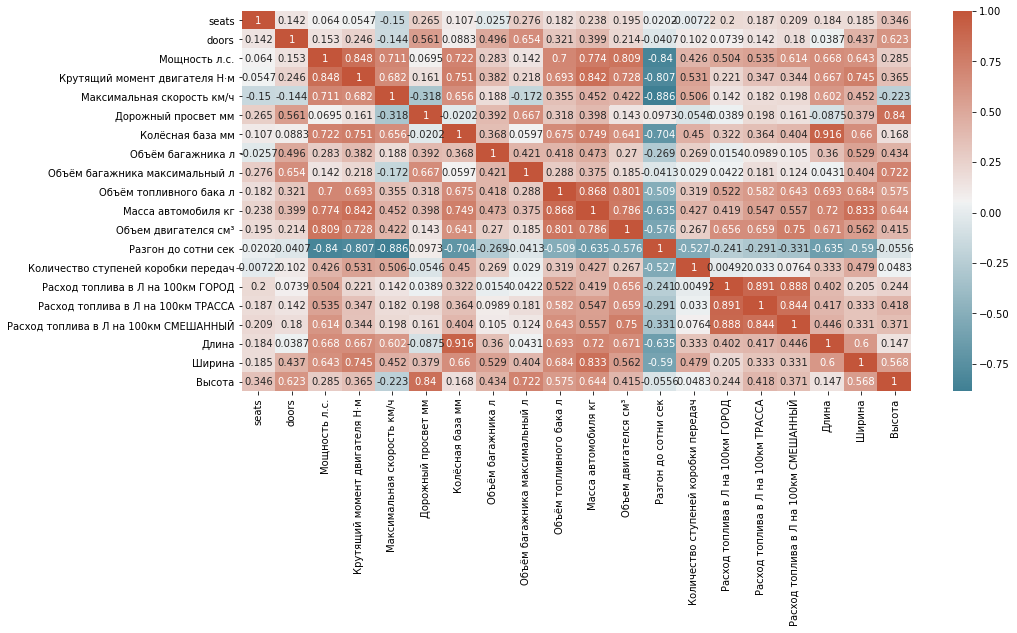

In [109]:
corr = data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
annot=True, fmt='.3g', cmap=sns.diverging_palette(220, 20, as_cmap=True))

Если считать, что высокий коэффициент корреляции - это 0.9 (или -0.9), то у нас так сильно коррелируют лишь 2 признака: колесная база и длина. Но оставим и не будем удалять

Посмотрим на различные распределения

In [110]:
def draw_hist(data, title, nbins=None):
    fig = px.histogram(data, title=title, nbins=nbins)
    fig.show('svg')

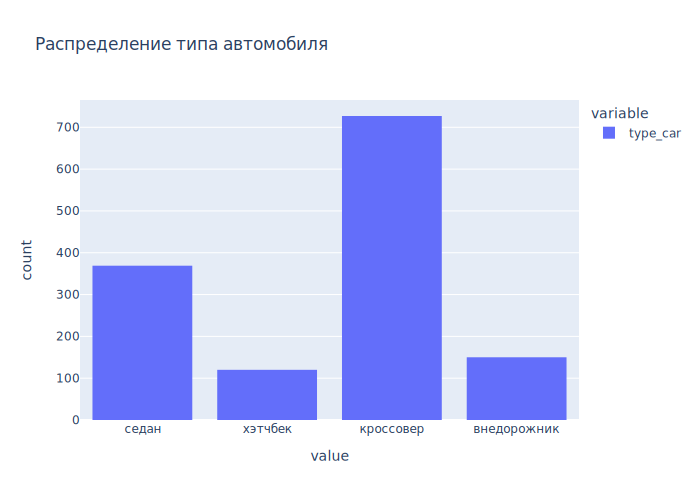

In [111]:
draw_hist(data['type_car'], title='Распределение типа автомобиля')

Видим, что присутствует дисбаланс классов. Кроссоверов в разы больше, чем хэтчбеков и внедорожников. Учтём это в дальнейшем, поигравшись с весами классов

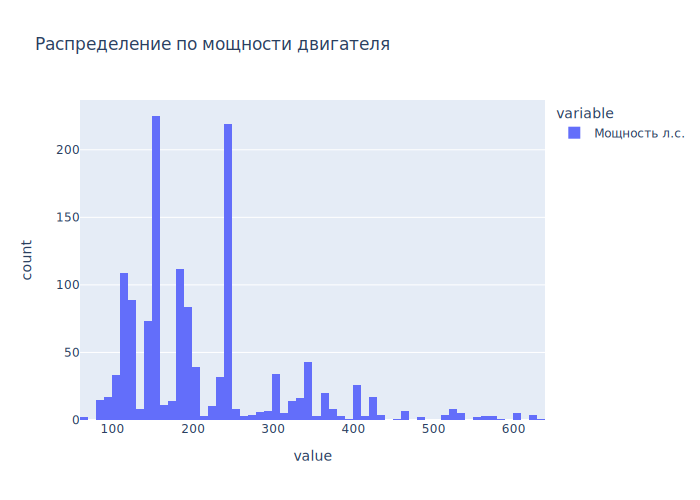

In [112]:
draw_hist(data['Мощность л.с.'], title='Распределение по мощности двигателя', nbins=75)

Распределение отдаленно похоже на бимодальное, но никак не на нормальное

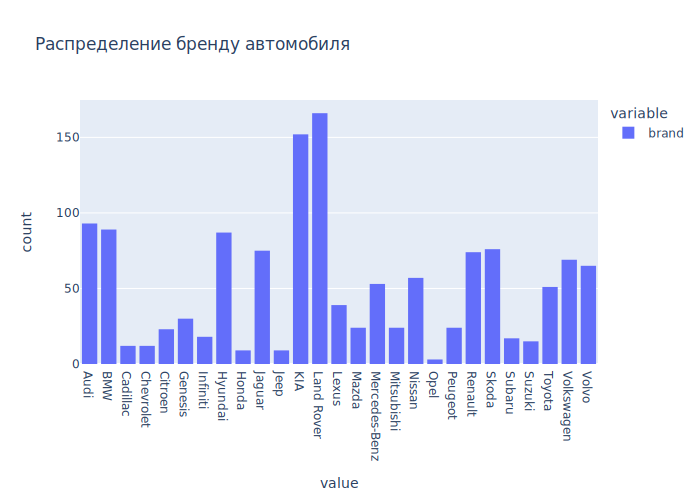

In [113]:
draw_hist(data['brand'], title='Распределение бренду автомобиля', nbins=75)

Аналогичным образом можно посмотреть распределения и остальных переменных

<a id='ml'></a>
# Решение задачи классификации

In [114]:
data.head(5)

,brand,model,complect,type_car,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Привод,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Тип двигателя,Объем двигателся см³,Разгон до сотни сек,Тип коробки передач,Количество ступеней коробки передач,Расход топлива в Л на 100км ГОРОД,Расход топлива в Л на 100км ТРАССА,Расход топлива в Л на 100км СМЕШАННЫЙ,Длина,Ширина,Высота
0,Audi,A3 Sedan,1.4 TFSI 7AMT,седан,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,седан,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
2,Audi,A3 Sedan,2.0 TFSI 7AMT,седан,5,4,190,320,передний,250,165,2637,425,880,50,1395,бензиновый,1984,6.8,роботизированная,7,7.2,4.7,5.6,4458,1796,1416
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,седан,5,4,190,320,полный,242,165,2637,390,845,55,1465,бензиновый,1984,6.2,роботизированная,7,7.2,4.8,5.7,4458,1796,1416
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,седан,5,4,190,320,передний,242,165,2637,425,880,50,1395,бензиновый,1984,6.8,роботизированная,7,7.2,4.7,5.6,4458,1796,1416


Для начала отделим целевую переменную и удалим ненужные нам признаки.

Целевая переменная - `type_car`, а ненужные признаки - `complect`, т.к. комплектация это практически уникальное явление для каждой модели.

In [115]:
target = data['type_car']
features = data.drop(['type_car', 'complect'], axis=1)

Теперь разобьем на обучающую и тестовую выборки, отделив под тестовую выборку четверть всех наших данных

In [116]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Убедимся, что распределения целевой переменной совпадают на обучающей и на тестовой выборке

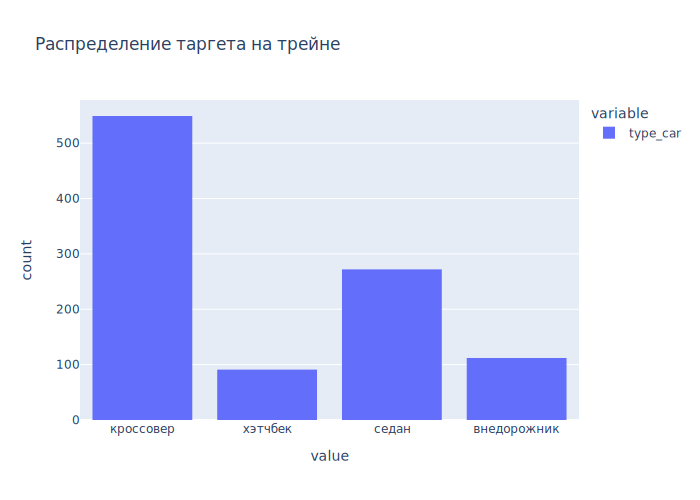

In [117]:
draw_hist(y_train, title='Распределение таргета на трейне')

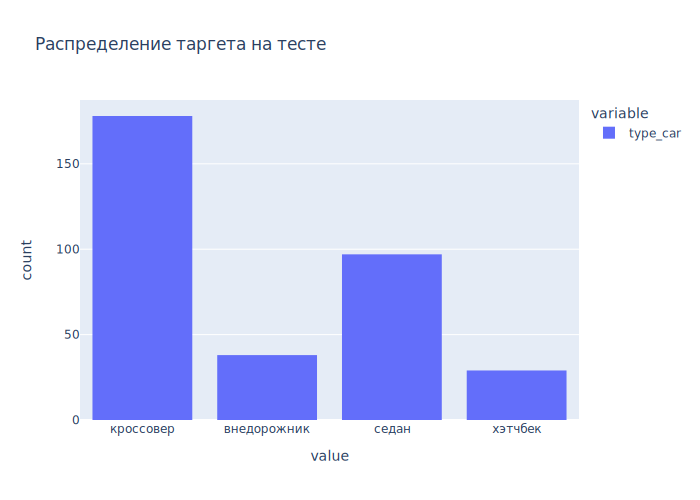

In [118]:
draw_hist(y_test, title='Распределение таргета на тесте')

Распределения таргета схожи - прекрасно

Для решения задачи мультиклассовой классификации возьмем модель градиентного бустинга **CatBoostClassifier**. Так как класса всего 4, модель должна хорошо себя показать (градиентный бустинг плох на большом количестве классов)

In [119]:
features.head(3)

,brand,model,seats,doors,Мощность л.с.,Крутящий момент двигателя Н·м,Привод,Максимальная скорость км/ч,Дорожный просвет мм,Колёсная база мм,Объём багажника л,Объём багажника максимальный л,Объём топливного бака л,Масса автомобиля кг,Тип двигателя,Объем двигателся см³,Разгон до сотни сек,Тип коробки передач,Количество ступеней коробки передач,Расход топлива в Л на 100км ГОРОД,Расход топлива в Л на 100км ТРАССА,Расход топлива в Л на 100км СМЕШАННЫЙ,Длина,Ширина,Высота
0,Audi,A3 Sedan,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
1,Audi,A3 Sedan,5,4,150,250,передний,224,165,2637,425,880,50,1320,бензиновый,1395,8.2,роботизированная,7,5.9,4.1,4.8,4458,1796,1416
2,Audi,A3 Sedan,5,4,190,320,передний,250,165,2637,425,880,50,1395,бензиновый,1984,6.8,роботизированная,7,7.2,4.7,5.6,4458,1796,1416


In [120]:
cat_features = ['brand', 'model', 'Привод', 'Тип двигателя', 'Тип коробки передач']

model = CatBoostClassifier(iterations=1000,
                            #eval_metric='F1',
                            verbose=False,
                            cat_features = cat_features,
                            loss_function='MultiClass')

In [121]:
grid = {'learning_rate': [0.03, 1],
        #'loss_function': ['CrossEntropy', 'Logloss'],
        'l2_leaf_reg': [0.5, 5],
        #'class_weights': [1, 2, 4.5, 5],
        #'max_depth': [8, 10]
       }

In [122]:
grid_search_result = model.grid_search(grid,
                                        cv=5,
                                        verbose=False,
                                        X=X_train,
                                        y=y_train,
                                        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.004750197854
bestIteration = 998


bestTest = 0.0003629577887
bestIteration = 997


bestTest = 0.01768152536
bestIteration = 999


bestTest = 0.003188660467
bestIteration = 991



In [123]:
grid_search_result['params']

{'learning_rate': 1, 'l2_leaf_reg': 0.5}

In [124]:
tuned_model = CatBoostClassifier(iterations=2500,
                            #eval_metric='F1',
                            verbose=False,
                            cat_features = cat_features,
                            **grid_search_result['params'],
                            loss_function='MultiClass')

In [125]:
tuned_model.fit(X_train, y_train)

In [126]:
predictions = tuned_model.predict(X_test)

<a id='estimate'></a>
## Оценка качества полученной модели

Посмотрим основные метрики. **Precision**, **Recall**, **Accuracy** и **F1**. Возьмем взвешенное среденее, т.к. задача не бинарной, а многоклассовой классификации

In [132]:
print(f'Значение accuracy: {accuracy_score(predictions, y_test)}')
print(f'Значение precision: {precision_score(predictions, y_test, average="weighted")}')
print(f'Значение recall: {recall_score(predictions, y_test, average="weighted")}')
print(f'Значение f1: {f1_score(predictions, y_test, average="weighted")}')

Значение accuracy: 0.9941520467836257
Значение precision: 0.9944598337950139
Значение recall: 0.9941520467836257
Значение f1: 0.9942147381135914


Отлично, все метрики получились практически идеальными. Модель ошиблась буквально в паре случаев, менее, чем в 1%.

Посмотрим на признаки, которые больше всего повлияли на модель

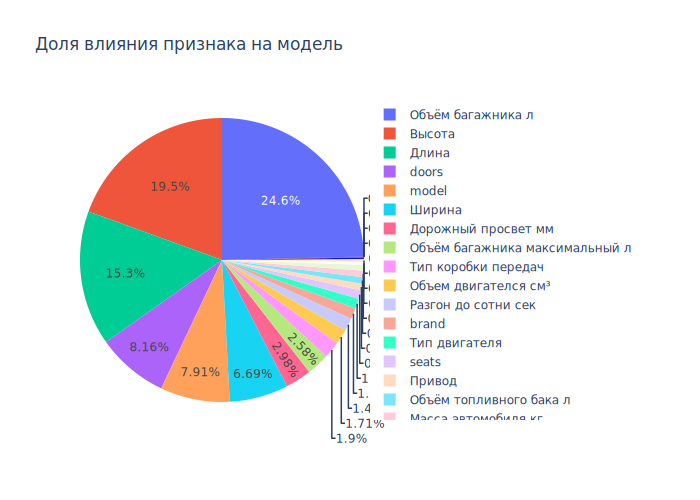

In [128]:
feature_importance = tuned_model.get_feature_importance()
top_features = pd.Series(feature_importance, index=X_test.columns).sort_values(ascending=False)
top_features = pd.DataFrame({'feature': top_features.index, 'importance': top_features.values})
fig = px.pie(top_features, values='importance', names='feature', title='Доля влияния признака на модель')
fig.show('svg')

Наибольшее влияние оказали объем багажника, высота автомобиля и его длина. Что достаточно логично. При этом утечки целевого признака не обнаружено

### Перспективы улучшения

Так как получилось практически идеальное качество, то чтобы добить его до идеального, можно попробовать перебрать больше гиперпараметров модели